In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
from IPython.display import Image, HTML

%matplotlib inline

#  NN III -- Stochastic Gradient Descent, Batches and Convolutional Neural Networks

## Recap

So far we covered
* Gradients, gradient descent and back propagation
* Fully connected neural networks (Multi-Layer Perceptron)
* Training of MLPs using back propagation

Today, we'll cover
* _Stochastic_ gradient descent (SGD)
* Convolutional Neural Networks (CNNs)
* Training a CNN with SGD

## Batches and Stochastic Gradient Descent


* Compute the gradient (e.g. forward pass and backward pass) with only a _random subset_
of the input data.

> We call the subset a _batch_.

* Work through the dataset by _randomly sampling without replacement_. This is the _stochastic_ part.

* One pass through the data is called an _epoch_.


For squared error loss with $N$ input samples, the loss for (full-batch) gradient descent was

$$
L = \sum_{i=0}^{N-1} \ell_i = \sum_{i=0}^{N-1} \left( y - \hat{y}  \right)^2
$$

For _Stochastic Gradient Descent_, we calculate the loss only on a _batch_ at as time.
For every time $t$, let's denote the batch as $\mathcal{B}_t$

$$
L_t = \sum_{i \in \mathcal{B}_t} \ell_i = \sum_{i \in \mathcal{B}_t} \left( y - \hat{y}  \right)^2
$$


Let's look at an example.

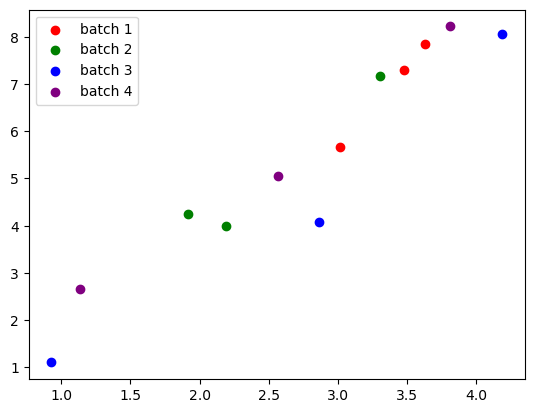

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 12 evenly spaced x values between 1 and 4
x = np.linspace(1, 4, 12)

# Add normally distributed noise to the x values
x += np.random.normal(0, 1.0, 12)

# Calculate the corresponding y values for the line y = 2x
y = 2 * x

# Add normally distributed noise to the y values
y += np.random.normal(0, 1.0, 12)

# Shuffle the points and split them into 3 groups of 4
indices = np.random.permutation(12)
colors = ['red', 'green', 'blue', 'purple']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

Say we have a training data set of 12 points and we want to use a _batch size_ of 3.

Divide the 12 points into batches of 3 by randomlly selecting points without replacement.

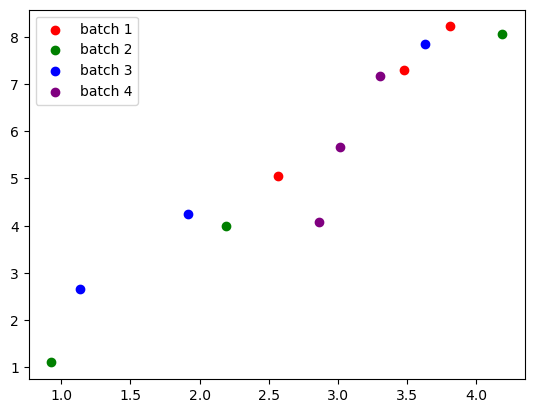

In [3]:
# Shuffle the points and split them into 3 groups of 4
indices = np.random.permutation(12)
colors = ['red', 'green', 'blue', 'purple']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

We can resample again to create a different set of batches.

Optionally, you can shuffle after every epoch.

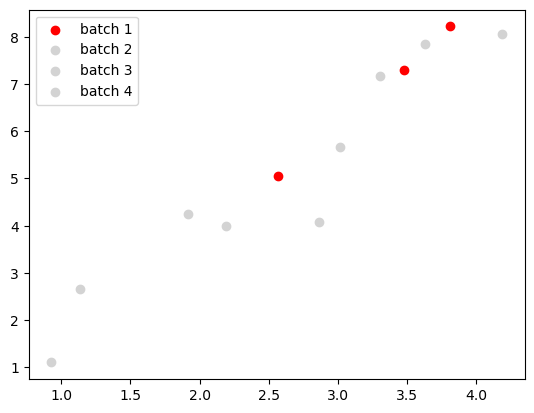

In [4]:
colors = ['red', 'lightgray', 'lightgray', 'lightgray']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

Then for every training iteration, you calculate the forward pass and backward pass loss with only the data from the batch.

Above, we use data from the 1st batch.

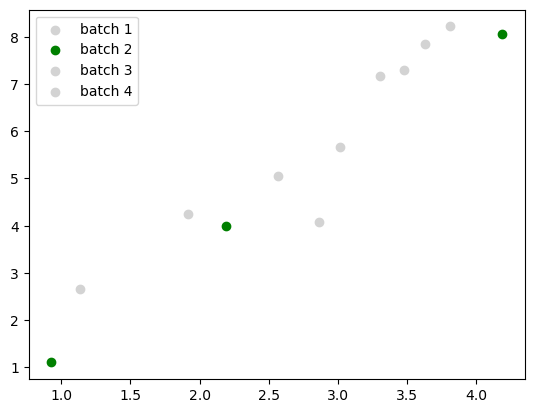

In [5]:
colors = ['lightgray', 'green', 'lightgray', 'lightgray']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

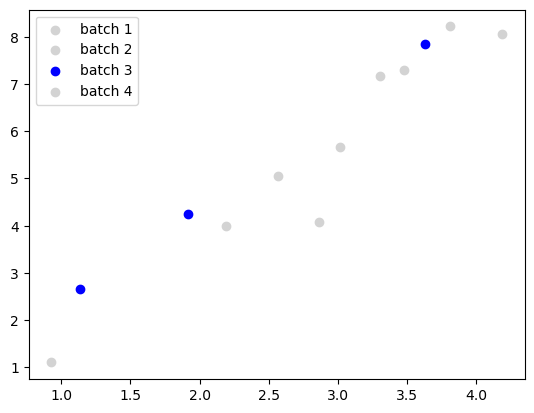

In [6]:
colors = ['lightgray', 'lightgray', 'blue', 'lightgray']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

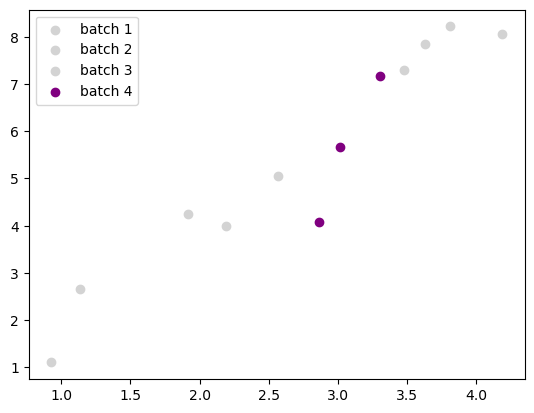

In [7]:
colors = ['lightgray', 'lightgray', 'lightgray', 'purple']
labels = ['batch 1', 'batch 2', 'batch 3', 'batch 4']

# Plot each group of points with a different color and label
for i in range(4):
    plt.scatter(x[indices[i*3:(i+1)*3]], y[indices[i*3:(i+1)*3]], color=colors[i], label=labels[i])

# Display the legend
plt.legend()

plt.show()

### Advantages of Stochastic Gradient Descent

There are two main advantages to _Stochastic Gradient Descent_.

1. You don't read and compute on every input data sample for every training iteration, 
    * Speeds up iteration while still making optimization progress
    * This works better with limited GPU memory and CPU cache. Not slowing down by thrashing limited memory.

2. Improves training convergence by adding _noise_ to the weight updates.
    * Can avoid getting stuck in a local minima.

An example

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-GD-vs-SGD.png" height="50%">
</center> 



This a contour plot showing a loss surface for a model with only 2 parameters.

For full-batch gradient descent, starting points 1 and 3 still end up at the
global minimum, but starting point 2 get stuck in a local minimum.

For stochastic gradient descent, starting point 1 still ends up at the global 
minimum, but now starting point 2 also avoids the local minimum and ends up at
the global minimum.

## Load an Image Dataset in Batches in PyTorch

In [8]:
%matplotlib inline

In [9]:
import torch
import torchvision
import torchvision.transforms as transforms

### 1. Load and Scale MNIST

Load MNIST handwritten digit dataset with 60K training samples and 10K test samples.

In [10]:
# Define a transform to scale the pixel values from [0, 255] to [-1, 1]
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

batch_size = 64

# Download and load the training data
trainset = torchvision.datasets.MNIST('./data/MNIST_data/', download=True,
                                    train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True)

# Download and load the test data
testset = torchvision.datasets.MNIST('./data/MNIST_data/', download=True,
                                    train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, 
                                         shuffle=True)

`torchvision.dataset.MNIST` is a convenience class which inherits from
`torch.utils.data.Dataset` (see [doc](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset))
that wraps a particular dataset and overwrites a `__getitem__()` method which retrieves a data sample given an 
index or a key.

If we give the argument `train=True`, it returns the training set, while the 
argument `train=False` returns the test set.

`torch.utils.data.DataLoader()` takes a dataset as in the previous line and
returns a python _iterable_ which lets you loop through the data.

We give `DataLoader` the _batch size_, and it will return a batch of data samples
on each iteration.

By passing `shuffle=True`, we are telling the data loader to shuffle the batches
after every epoch.

In [11]:
print(f"No. of training images: {len(trainset)}")
print(f"No. of test images: {len(testset)}")
print("The dataset classes are:")
print(trainset.classes)

No. of training images: 60000
No. of test images: 10000
The dataset classes are:
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


We can see the data loader, `trainloader` in action in the code below to
get a batch and visualize it.

Everytime we rerun the cell we will get a different batch.

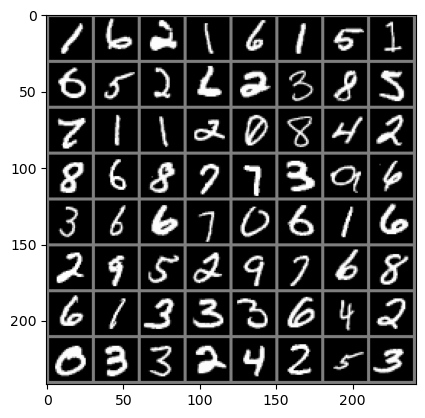

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

We can display the training labels for the image as well.

In [13]:
from IPython.display import display, HTML

# Assuming batch_size is 64 and images are displayed in an 8x8 grid
labels_grid = [trainset.classes[labels[j]] for j in range(64)]
labels_grid = np.array(labels_grid).reshape(8, 8)

df = pd.DataFrame(labels_grid)

# Generate HTML representation of DataFrame with border
html = df.to_html(border=1)

# Display the DataFrame
display(HTML(html))

,0,1,2,3,4,5,6,7
0,1 - one,6 - six,2 - two,1 - one,6 - six,1 - one,5 - five,1 - one
1,6 - six,5 - five,2 - two,6 - six,2 - two,3 - three,8 - eight,5 - five
2,7 - seven,1 - one,1 - one,2 - two,0 - zero,8 - eight,4 - four,2 - two
3,8 - eight,6 - six,8 - eight,7 - seven,7 - seven,3 - three,9 - nine,6 - six
4,3 - three,6 - six,6 - six,7 - seven,0 - zero,6 - six,1 - one,6 - six
5,2 - two,9 - nine,5 - five,2 - two,9 - nine,7 - seven,6 - six,8 - eight
6,6 - six,1 - one,3 - three,3 - three,3 - three,6 - six,4 - four,2 - two
7,0 - zero,3 - three,3 - three,2 - two,4 - four,2 - two,5 - five,3 - three


## Convolutional Network Applications

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-img-class.svg" height="50%">
</center> 

* Multi-class classification problem ( >2 possible classes)
* Convolutional network with classification output

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-obj-det.png" height="50%">
</center> 

* Localize and classify objects in an image
* Convolutional network with classification _and_ regression output

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-img-seg.png" height="50%">
</center> 

* Classify each pixel in an image to 2 or more classes
* Convolutional encoder-decoder network with a classification values for each pixel.

## Convolutional Neural Networks

Problems with fully-connected networks

* Size
    * 224x224 RGB image = 150,528 dimensions
    * Hidden layers generally larger than inputs
    * One hidden layer = 150,520x150,528 weights -- 22 billion
* Nearby pixels statistically related
    * But fully connected network doesn't exploit spatial correlation
* Should be stable under transformations
    * Don’t want to re-learn appearance at different parts of image

Solution: Convolutional Neural Networks

* Parameters only look at local data regions

* Shares parameters across image or signal

### Example with 1-D Input Data

In _convolutional neural networks_, we define a set of weights that we move across
the input data.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>
<img src="figs/NN-figs/L25-conv04.png" height="75%">
</center> 

Example with 3 weights and input of length 6.

For figure (a), we calculate 

$$ z_2 = \omega_1 x_1 + \omega_2 x_2 + \omega_3 x_3 $$

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv05.png" height="75%">
</center> 

To calculate $z_2$, we shift the weights over 1 place (figure (b)) and then
weight and sum the inputs. We can generalize the equation slightly.

$$ z_i = \omega_1 x_{i - 1} + \omega_2 x_i + \omega_3 x_{i+1} $$

But what do we do about $z_1$?

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->

<center>
<img src="figs/NN-figs/L25-conv06.png" height="75%">
</center> 

We can calculate $z_1$ by _padding_ our input data. In figure (c), we
simply add $0$, which means we can now calculate $z_1$.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv07.png" height="75%">
</center> 

Alternatively, we can just reduce the size of the output, by only calculating where
we have _valid_ input data, as in figure (d).

For 1-D data, this reduces the output size by 1 at the beginning and end of the
data, so by 2 overall for length-3 filter.

<!-- Image Credit "https://udlbook.github.io/udlbook/"-->
<center>    
<img src="figs/NN-figs/L25-conv-fig10-3.png" height="75%">
</center> 

There are a few design choices one can make with convolution layers, such as:

1. _filter length_, e.g. size 3 in figures (a) and (b)
2. _stride_, which is how much you shift to calculate the next output. Common values are
    1. _stride 1_ as we saw in the previous examples and in figures (c) and (d)
    2. _stride 2_, where you shift by 2 instead of 1, an effectively halve the size of the output as in figures (a) and (b)
3. _dilation_, where you expand the filter as in figure (d)

### 2D Convolution

For images and video frames we use a two-dimensional convolution
(called `conv2d` in PyTorch) which is an extension of the 1-D
convolution as shown in the following illustration.

<!-- Image Credit "https://cs231n.github.io/convolutional-networks/"-->
<center>    
<img src="figs/NN-figs/L25-conv-2d.png" height="50%">
</center> 

---
[cs231n](https://cs231n.github.io/convolutional-networks/)

To see this figure animated, clone the class repo and click on the file `./conv-demo/index.html`.


## Define a Convolutional Neural Network in PyTorch


We will do the following steps in order:

1. We already loaded and scaled the MNIST training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

In [14]:
# network for MNIST
import torch
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

net = Net()

### 3. Define a Loss function and optimizer
We'll use a Classification Cross-Entropy loss and SGD with momentum.

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Cross Entropy Loss

* Popular loss function for multi-class classification that measures the _dissimilarity_ between the predicted class log probability $\log(p_i)$ and the true class $y_i$.

$$ - \sum_i y_i \log(p_i)) $$

See for example [here](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) for more information.

#### Momentum

Momentum is a technique used in optimizing neural networks that helps accelerate gradients vectors in the right directions, leading to faster convergence. It is inspired by physical laws of motion where the optimizer uses 'momentum' to push over hilly terrain and valleys to find the global minimum.

In gradient descent, the weight update rule with momentum is given by:



$$ 
m_{t+1} = \beta m_t + (1 - \beta) \nabla J(w)
$$

$$
w_{t+1} = w_t - \alpha m_{t+1}
$$

where:

* $m_t$ is the momentum (which drives the update at iteration $t$), 
* $\beta \in [0, 1)$, typically 0.9, controls the degree to which the gradient is smoothed over time, and 
* $\alpha$ is the learning rate.

See _Understanding Deep Learning_, Section 6.3 to learn more.

### 4. Train the network

In [16]:
print(f"[Epoch #, Iteration #] loss")
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch #, Iteration #] loss
[1,   100] loss: 0.109
[1,   200] loss: 0.063
[1,   300] loss: 0.026
[1,   400] loss: 0.020
[1,   500] loss: 0.019
[1,   600] loss: 0.017
[1,   700] loss: 0.016
[1,   800] loss: 0.015
[1,   900] loss: 0.014
[2,   100] loss: 0.013
[2,   200] loss: 0.012
[2,   300] loss: 0.011
[2,   400] loss: 0.011
[2,   500] loss: 0.010
[2,   600] loss: 0.010
[2,   700] loss: 0.009
[2,   800] loss: 0.010
[2,   900] loss: 0.009
Finished Training


Not necessary, but we save the network to storage.

In [17]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Display some of the images from the test set with the ground truth labels.

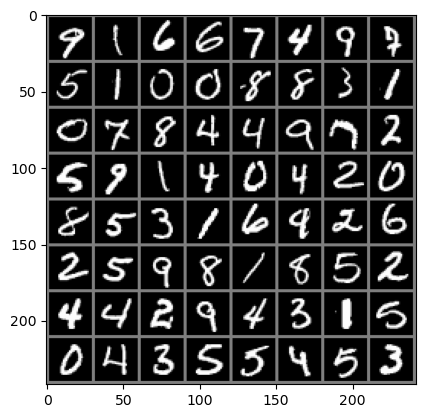

In [18]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join(f'{testset.classes[labels[j]]:5s}' for j in range(4)))

In [19]:
from IPython.display import display, HTML

# Assuming batch_size is 64 and images are displayed in an 8x8 grid
labels_grid = [testset.classes[labels[j]] for j in range(64)]
labels_grid = np.array(labels_grid).reshape(8, 8)

df = pd.DataFrame(labels_grid)

# Generate HTML representation of DataFrame with border
html = df.to_html(border=1)

# Display the DataFrame
display(HTML(html))

,0,1,2,3,4,5,6,7
0,9 - nine,1 - one,6 - six,6 - six,7 - seven,4 - four,9 - nine,7 - seven
1,5 - five,1 - one,0 - zero,0 - zero,8 - eight,8 - eight,3 - three,1 - one
2,0 - zero,7 - seven,8 - eight,4 - four,4 - four,9 - nine,7 - seven,2 - two
3,5 - five,9 - nine,1 - one,4 - four,0 - zero,4 - four,2 - two,0 - zero
4,8 - eight,5 - five,3 - three,1 - one,6 - six,9 - nine,2 - two,6 - six
5,2 - two,5 - five,9 - nine,8 - eight,1 - one,8 - eight,5 - five,2 - two
6,4 - four,4 - four,2 - two,9 - nine,4 - four,3 - three,1 - one,5 - five
7,0 - zero,4 - four,3 - three,5 - five,5 - five,4 - four,5 - five,3 - three


We'll load the model back from storage, which is not strictly necessary since it
is still in memory, but for illustration purposes.

In [20]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Let's run inference (forward pass) on the model to get numeric outputs.

In [21]:
outputs = net(images)

Get the index of the element with highest value and print the label 
associated with that index.

In [22]:
_, predicted = torch.max(outputs, 1)

#print('Predicted: ', ' '.join(f'{testset.classes[predicted[j]]:5s}'
#                              for j in range(4)))

In [23]:
# Assuming batch_size is 64 and images are displayed in an 8x8 grid
labels_grid = [testset.classes[predicted[j]] for j in range(64)]
labels_grid = np.array(labels_grid).reshape(8, 8)

df = pd.DataFrame(labels_grid)

# Generate HTML representation of DataFrame with border
html = df.to_html(border=1)

# Display the DataFrame
display(HTML(html))

,0,1,2,3,4,5,6,7
0,9 - nine,1 - one,6 - six,6 - six,7 - seven,4 - four,9 - nine,7 - seven
1,5 - five,1 - one,0 - zero,0 - zero,8 - eight,8 - eight,1 - one,1 - one
2,0 - zero,7 - seven,8 - eight,4 - four,4 - four,9 - nine,7 - seven,2 - two
3,5 - five,9 - nine,1 - one,4 - four,0 - zero,4 - four,2 - two,0 - zero
4,8 - eight,5 - five,3 - three,1 - one,6 - six,9 - nine,2 - two,6 - six
5,2 - two,5 - five,9 - nine,8 - eight,1 - one,8 - eight,5 - five,2 - two
6,4 - four,4 - four,2 - two,9 - nine,4 - four,3 - three,1 - one,5 - five
7,0 - zero,4 - four,3 - three,5 - five,5 - five,4 - four,5 - five,3 - three


Evaluate over the entire test set.

In [24]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 95 %


Evaluate the performance per class.

In [25]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in testset.classes}
total_pred = {classname: 0 for classname in testset.classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[testset.classes[label]] += 1
            total_pred[testset.classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0 - zero is 98.8 %
Accuracy for class: 1 - one is 98.7 %
Accuracy for class: 2 - two is 95.1 %
Accuracy for class: 3 - three is 95.2 %
Accuracy for class: 4 - four is 96.7 %
Accuracy for class: 5 - five is 93.8 %
Accuracy for class: 6 - six is 96.7 %
Accuracy for class: 7 - seven is 94.7 %
Accuracy for class: 8 - eight is 92.8 %
Accuracy for class: 9 - nine is 92.5 %


### To Dig Deeper

Look at common CNN network architectures. 

For example in _Understanding Deep Learning_ section 10.5.